In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
prediction = pd.read_csv('price_increase_rf.csv',index_col=0)
prediction.head()

,y_pred_postlightrail,y_pred_prelightrail,y_true
0,777.720966,448.782036,254.141566
1,777.720966,448.782036,957.266566
2,684.654752,274.792471,85.889571
3,646.387317,278.416076,158.057360
4,1007.519303,298.320461,259.090909


In [3]:
prediction['true_percent_increase'] = (prediction['y_pred_postlightrail'] - prediction['y_true'])/prediction['y_true']*100
prediction.head()

,y_pred_postlightrail,y_pred_prelightrail,y_true,true_percent_increase
0,777.720966,448.782036,254.141566,206.018798
1,777.720966,448.782036,957.266566,-18.756071
2,684.654752,274.792471,85.889571,697.133747
3,646.387317,278.416076,158.057360,308.957429
4,1007.519303,298.320461,259.090909,288.867100


In [4]:
np.mean(prediction['true_percent_increase'])

265.7531264357365

In [5]:
prediction['pred_percent_increase'] = (prediction['y_pred_postlightrail'] - prediction['y_pred_prelightrail'])/prediction['y_pred_prelightrail']*100
prediction.head()

,y_pred_postlightrail,y_pred_prelightrail,y_true,true_percent_increase,pred_percent_increase
0,777.720966,448.782036,254.141566,206.018798,73.295922
1,777.720966,448.782036,957.266566,-18.756071,73.295922
2,684.654752,274.792471,85.889571,697.133747,149.153388
3,646.387317,278.416076,158.057360,308.957429,132.165946
4,1007.519303,298.320461,259.090909,288.867100,237.730540


In [6]:
np.mean(prediction['pred_percent_increase'])

209.08705190288956

In [7]:
np.std(prediction['pred_percent_increase'])

92.8677276425474

In [8]:
prediction['true_diff'] = prediction['y_pred_postlightrail'] - prediction['y_true']
prediction['pred_diff'] = prediction['y_pred_postlightrail'] - prediction['y_pred_prelightrail']
prediction.head()

,y_pred_postlightrail,y_pred_prelightrail,y_true,true_percent_increase,pred_percent_increase,true_diff,pred_diff
0,777.720966,448.782036,254.141566,206.018798,73.295922,523.579399,328.938930
1,777.720966,448.782036,957.266566,-18.756071,73.295922,-179.545601,328.938930
2,684.654752,274.792471,85.889571,697.133747,149.153388,598.765181,409.862281
3,646.387317,278.416076,158.057360,308.957429,132.165946,488.329957,367.971241
4,1007.519303,298.320461,259.090909,288.867100,237.730540,748.428394,709.198843


In [9]:
prediction.shape

(11739, 7)

In [10]:
subway1 = pd.read_csv('/Users/Laura/GoogleDrive/NYU/Capstone/OLD/Subway/subwaydist.csv',index_col=0)
subway1.shape

(316049, 3)

In [11]:
subway2 = pd.read_csv('/Users/Laura/GoogleDrive/NYU/Capstone/OLD/Subway/updatedsubwaydist.csv',index_col=0)
subway2.shape

(316049, 3)

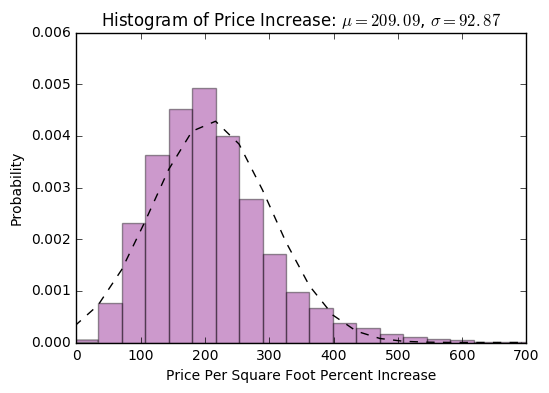

In [12]:
num_bins = 25
# the histogram of the data
n, bins, patches = plt.hist(prediction['pred_percent_increase'], num_bins, normed=1, facecolor='purple', alpha=0.4)
# add a 'best fit' line
y = mlab.normpdf(bins, np.mean(prediction['pred_percent_increase']), np.std(prediction['pred_percent_increase']))
plt.plot(bins, y, 'k--')
plt.axis([0, 700, 0, 0.006])
plt.xlabel('Price Per Square Foot Percent Increase')
plt.ylabel('Probability')
plt.title(r'Histogram of Price Increase: $\mu=209.09$, $\sigma=92.87$')



# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

plt.savefig('hist.pdf', bbox_inches='tight')
plt.show()


In [13]:
plt.cla()

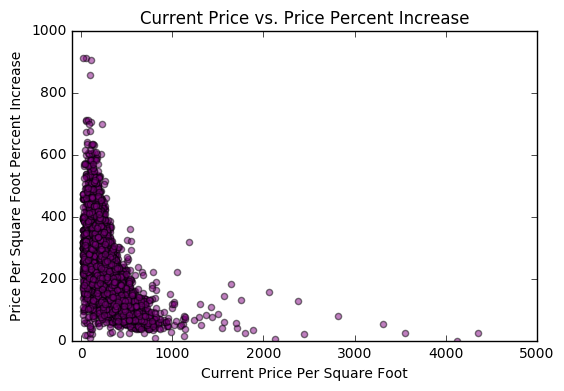

In [27]:
plt.scatter(prediction['y_true'],prediction['pred_percent_increase'],facecolor='purple', alpha=0.5)
plt.axis([-100, 5000, 0, 1000])
plt.xlabel('Current Price Per Square Foot')
plt.ylabel('Price Per Square Foot Percent Increase')
plt.title(r'Current Price vs. Price Percent Increase')
plt.savefig('scatter.pdf', bbox_inches='tight')
plt.show()